In [1]:
import ast
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/MyDrive/Thesis_Simulation/Big eta/Avg alpha

Mounted at /content/gdrive
/content/gdrive/MyDrive/Thesis_Simulation/Big eta/Avg alpha


In [3]:
rounds = 100
vehicle_limit = 80
all_routes = [[0, 3], [0, 1], [2, 3], [2, 1]]

In [4]:
record = pd.read_csv(f'Saved_data/Simulation_records/Round_{rounds}.csv')
utility = pd.read_csv(f'Saved_data/Utility_data/Round_{rounds}.csv')

In [5]:
record

Vehicle_label Road_order  Total_time Leading_vehicles  \
0                 0     [0, 1]       67.45       [-999, 12]   
1                 1     [0, 3]      100.25          [0, 11]   
2                 2     [2, 3]       67.75     [-999, -999]   
3                 3     [0, 3]      102.35           [1, 1]   
4                 4     [0, 1]       78.10          [3, 22]   
...             ...        ...         ...              ...   
7995             75     [0, 1]      126.85         [74, 74]   
7996             76     [0, 1]      126.05         [75, 75]   
7997             77     [0, 1]      126.70         [76, 76]   
7998             78     [0, 1]      127.55         [77, 77]   
7999             79     [0, 1]      128.45         [78, 78]   

                 Stopped_time         Stop_while_front  Round_number  
0                      [0, 0]                   [0, 0]             1  
1                      [0, 0]                   [0, 0]             1  
2                      [0, 0]                   [0, 0]             1  
3                      [0, 0]                   [0, 0]             1  
4     [2.6999999999999984, 0]  [2.6999999999999984, 0]             1  
...                       ...                      ...           ...  
7995                   [0, 0]                   [0, 0]           100  
7996                   [0, 0]                   [0, 0]           100  
7997                   [0, 0]                   [0, 0]           100  
7998                   [0, 0]                   [0, 0]           100  
7999                   [0, 0]                   [0, 0]           100  

[8000 rows x 7 columns]

In [6]:
record['Road_order'] = record.apply(lambda row: ast.literal_eval(row['Road_order']), axis=1)
record["Road_order_label"] = record.apply(lambda row: all_routes.index(row.Road_order), axis=1)

utility['Routes_taken'] = utility.apply(lambda row: ast.literal_eval(row['Routes_taken']), axis=1)

In [7]:
# time_df = pd.DataFrame(utility['Routes_taken'].to_list(), columns=range(rounds))
# print(time_df.shape)
# display(time_df.head(10))

In [8]:
time_df = pd.pivot_table(record, values='Total_time', 
                         index=['Road_order_label', 'Round_number'], 
                         aggfunc=np.mean).reset_index(drop=False)
time_df.loc[time_df.Road_order_label==1].sort_values('Round_number').Total_time.values

array([107.94782609, 108.2575    , 113.9025    , 106.81470588,
       127.78378378, 123.79680851, 125.7825    , 124.68369565,
       128.35375   , 121.808     , 116.51046512, 123.8606383 ,
       121.56395349, 128.42065217, 126.37045455, 133.89125   ,
       120.29038462, 126.03684211, 126.28958333, 125.42708333,
       135.73809524, 130.34673913, 118.83846154, 134.03414634,
       137.35326087, 128.21888889, 125.86363636, 130.05729167,
       122.65222222, 116.43409091, 123.196     , 121.40465116,
       121.94021739, 123.8047619 , 133.42954545, 131.05357143,
       128.79      , 118.46363636, 128.75333333, 126.86595745,
       131.24555556, 120.90625   , 126.44777778, 126.837     ,
       131.96595745, 122.73414634, 126.49795918, 135.51976744,
       129.40568182, 127.72272727, 132.27954545, 127.80945946,
       127.57840909, 123.31888889, 124.63125   , 128.92021277,
       130.45      , 126.42604167, 135.95357143, 126.60119048,
       123.17708333, 116.4173913 , 133.99      , 126.53

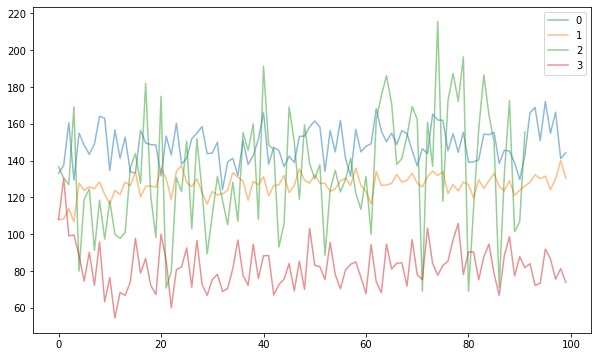

In [9]:
# Changes in average time needed to go through each route over time
plot_route_time = [[], [], [], []]

for i in range(4):
    times = time_df.loc[time_df.Road_order_label==i].sort_values('Round_number').Total_time.values
    plot_route_time[i]=times
        
fig, ax = plt.subplots(figsize=(10, 6))

for i in range(4):
    ax.plot(plot_route_time[i], label=str(i), alpha=0.5)
    
plt.legend()

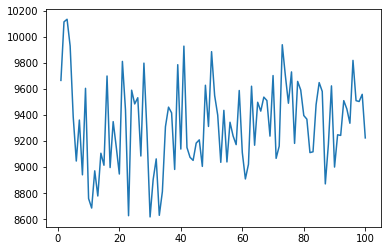

In [10]:
time_df2 = pd.pivot_table(record, values='Total_time', index='Round_number', aggfunc=np.sum).reset_index(drop=False)
plt.plot(time_df2.Round_number, time_df2.Total_time)

In [11]:
time_df2.Total_time[-20:].mean()

9368.912499999878

In [12]:
utility

Vehicle_label                                          Utilities  \
0               0  [-18.88424465536641, -18.624942675031534, -17....   
1               1  [-322.5918590486835, -225.56472063121393, -224...   
2               2  [-28.82867438608992, -27.674156140494485, -24....   
3               3  [-24.13637131859705, -19.03639382327886, -19.7...   
4               4  [-89.49482447492566, -70.78253190652953, -65.7...   
..            ...                                                ...   
75             75  [-16.719705801456, -16.084126783006038, -19.50...   
76             76  [-554.2914695803813, -451.35734061133815, -634...   
77             77  [-12.939902655516935, -12.617329199111047, -15...   
78             78  [-134.300230164278, -115.44766554825863, -160....   
79             79  [-38.11668259121849, -34.74583282513314, -41.6...   

                                        Probabilities  \
0   [0.00531763271298716, 0.0068917855741145615, 0...   
1   [1.708206014827994e-83, 2.349043484424118e-41,...   
2   [0.0001666701800523899, 0.000528760260536227, ...   
3   [0.00024650379646223424, 0.04043111295283171, ...   
4   [2.1292550517200547e-18, 2.850185278065248e-10...   
..                                                ...   
75  [0.3328876000012178, 0.6285300970009674, 0.020...   
76  [5.580336044228647e-36, 1.0, 2.726681613077903...   
77  [0.34768696931450876, 0.4800431606648398, 0.03...   
78  [6.49284761438999e-09, 0.9999999831093566, 2.5...   
79  [0.030319322663903938, 0.8823907516932086, 0.0...   

                                         Routes_taken     Gamma       Eta  
0   [1, 2, 0, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...  5.735166  1.310407  
1   [0, 1, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...  4.883270  1.920684  
2   [2, 1, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...  5.071551  1.425852  
3   [0, 3, 1, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...  4.494891  1.367692  
4   [1, 2, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...  4.965336  1.649728  
..                                                ...       ...       ...  
75  [0, 2, 1, 3, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 3, ...  6.040464  1.197780  
76  [3, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...  4.939242  1.928916  
77  [1, 2, 0, 3, 0, 3, 1, 3, 0, 3, 1, 3, 1, 0, 1, ...  4.486485  1.143868  
78  [1, 2, 3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...  4.890795  1.669820  
79  [2, 0, 3, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, ...  4.471894  1.434460  

[80 rows x 6 columns]

In [13]:
# utility['Probabilities'] = utility.apply(lambda row: ast.literal_eval(row['Probabilities']), axis=1)
# prob_df = pd.DataFrame(utility['Probabilities'].to_list(), columns=range(4))
# print(prob_df.shape)
# display(prob_df.head(10))

In [14]:
route_df = pd.DataFrame(utility['Routes_taken'].to_list(), columns=range(rounds))
print(route_df.shape)
display(route_df.head(10))

(80, 100)


0   1   2   3   4   5   6   7   8   9   ...  90  91  92  93  94  95  96  \
0   1   2   0   3   3   1   3   3   3   3  ...   3   3   1   3   0   3   3   
1   0   1   2   3   3   3   3   3   3   3  ...   3   3   3   3   3   3   3   
2   2   1   3   0   3   3   3   3   3   3  ...   3   3   3   3   3   3   3   
3   0   3   1   2   3   3   3   3   3   3  ...   3   3   3   3   3   3   3   
4   1   2   0   3   3   3   3   3   3   3  ...   3   3   3   3   3   3   3   
5   1   2   3   0   3   0   3   3   3   2  ...   3   3   3   2   3   3   3   
6   1   2   0   3   3   3   3   3   3   3  ...   1   0   3   3   3   3   3   
7   1   0   2   3   3   3   3   3   3   3  ...   3   3   3   3   3   3   3   
8   2   0   1   3   3   3   3   3   3   3  ...   3   3   3   3   3   3   3   
9   2   1   3   0   3   3   3   3   3   3  ...   3   3   3   3   3   3   3   

   97  98  99  
0   1   3   3  
1   3   3   3  
2   3   3   3  
3   3   3   3  
4   3   3   3  
5   3   3   3  
6   3   3   3  
7   3   3   3  
8   3   3   3  
9   3   3   3  

[10 rows x 100 columns]

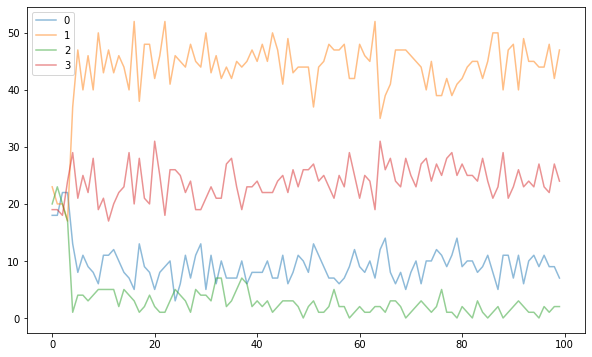

In [15]:
# Changes in number of vehicles that took the route over time
plot_route_l = [[], [], [], []]

for i in range(4):
    for j in range(rounds):
        plot_route_l[i].append(len(route_df.loc[route_df[j]==i]))
        
fig, ax = plt.subplots(figsize=(10, 6))

for i in range(4):
    ax.plot(plot_route_l[i], label=str(i), alpha=0.5)
    
plt.legend()

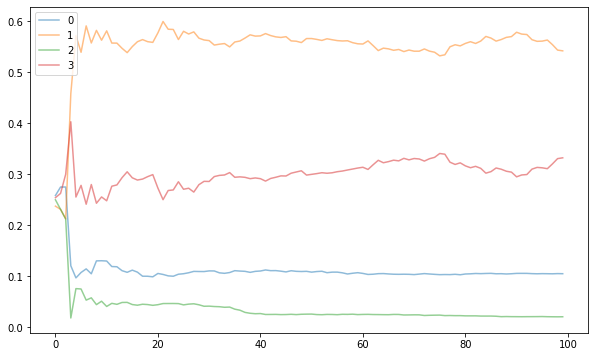

In [16]:
# Changes in vehicles' probabilities of selecting each route over time
plot_prob_l = [[], [], [], []]

for r in range(1, rounds+1):
    df = pd.read_csv(f'Saved_data/Utility_data/Round_{r}.csv')
    df['Probabilities'] = df.apply(lambda row: ast.literal_eval(row['Probabilities']), axis=1)
    for i in range(4):
        avg_prob = pd.DataFrame(df['Probabilities'].to_list(), columns=range(4))[i].mean()
        plot_prob_l[i].append(avg_prob)
        
        
fig, ax = plt.subplots(figsize=(10, 6))

for i in range(4):
    ax.plot(plot_prob_l[i], label=str(i), alpha=0.5)
    
plt.legend()

In [17]:
utility

Vehicle_label                                          Utilities  \
0               0  [-18.88424465536641, -18.624942675031534, -17....   
1               1  [-322.5918590486835, -225.56472063121393, -224...   
2               2  [-28.82867438608992, -27.674156140494485, -24....   
3               3  [-24.13637131859705, -19.03639382327886, -19.7...   
4               4  [-89.49482447492566, -70.78253190652953, -65.7...   
..            ...                                                ...   
75             75  [-16.719705801456, -16.084126783006038, -19.50...   
76             76  [-554.2914695803813, -451.35734061133815, -634...   
77             77  [-12.939902655516935, -12.617329199111047, -15...   
78             78  [-134.300230164278, -115.44766554825863, -160....   
79             79  [-38.11668259121849, -34.74583282513314, -41.6...   

                                        Probabilities  \
0   [0.00531763271298716, 0.0068917855741145615, 0...   
1   [1.708206014827994e-83, 2.349043484424118e-41,...   
2   [0.0001666701800523899, 0.000528760260536227, ...   
3   [0.00024650379646223424, 0.04043111295283171, ...   
4   [2.1292550517200547e-18, 2.850185278065248e-10...   
..                                                ...   
75  [0.3328876000012178, 0.6285300970009674, 0.020...   
76  [5.580336044228647e-36, 1.0, 2.726681613077903...   
77  [0.34768696931450876, 0.4800431606648398, 0.03...   
78  [6.49284761438999e-09, 0.9999999831093566, 2.5...   
79  [0.030319322663903938, 0.8823907516932086, 0.0...   

                                         Routes_taken     Gamma       Eta  
0   [1, 2, 0, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...  5.735166  1.310407  
1   [0, 1, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...  4.883270  1.920684  
2   [2, 1, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...  5.071551  1.425852  
3   [0, 3, 1, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...  4.494891  1.367692  
4   [1, 2, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...  4.965336  1.649728  
..                                                ...       ...       ...  
75  [0, 2, 1, 3, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 3, ...  6.040464  1.197780  
76  [3, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...  4.939242  1.928916  
77  [1, 2, 0, 3, 0, 3, 1, 3, 0, 3, 1, 3, 1, 0, 1, ...  4.486485  1.143868  
78  [1, 2, 3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...  4.890795  1.669820  
79  [2, 0, 3, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, ...  4.471894  1.434460  

[80 rows x 6 columns]

In [18]:
# utility['Probabilities'] = utility.apply(lambda row: ast.literal_eval(row['Probabilities']), axis=1)
# pd.DataFrame(df['Probabilities'].to_list(), columns=range(4))[i].mean()

In [19]:
plot_eta_prob = [[], [], [], []]

utility['Probabilities'] = utility.apply(lambda row: ast.literal_eval(row['Probabilities']), axis=1)
# pd.DataFrame(utility['Probabilities'].to_list(), columns=range(4))[i].values

for i in range(4):
    plot_eta_prob[i]=pd.DataFrame(utility['Probabilities'].to_list(), columns=range(4))[i].values

In [20]:
# pd.DataFrame(utility['Probabilities'].to_list(), columns=range(4))[i].values

In [21]:
# len(utility.Eta.values), len(plot_eta_prob[1])

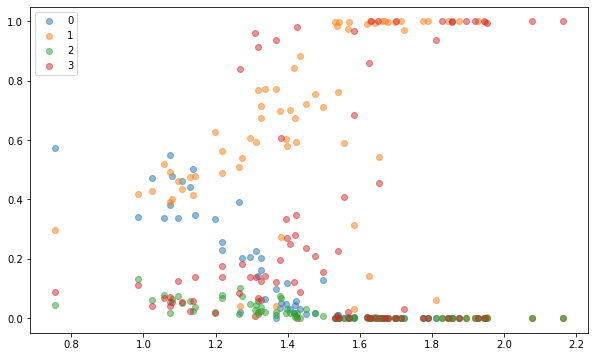

In [22]:
fig, ax = plt.subplots(figsize=(10, 6))

for i in range(4):
    ax.scatter(utility.Eta.values, plot_eta_prob[i], label=str(i), alpha=0.5)
    
plt.legend()

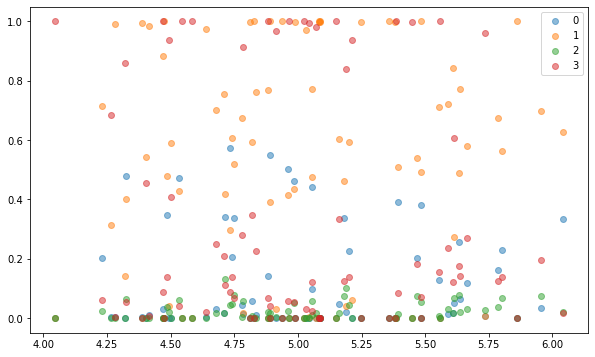

In [23]:
plot_gamma_prob = plot_eta_prob

fig, ax = plt.subplots(figsize=(10, 6))

for i in range(4):
    ax.scatter(utility.Gamma.values, plot_gamma_prob[i], label=str(i), alpha=0.5)
    
plt.legend()

In [24]:
summary = pd.read_csv('Saved_data/Simulation_records/Summary.csv')

In [25]:
summary.head(20)

Vehicle_label  Road_order  Caused_delay  Count  Total_time
0               0           0          0.00      2  102.025000
1               0           1          0.49      5   72.610000
2               0           2          0.00      5   67.750000
3               0           3          0.00     88   36.400000
4               1           0          0.00      1  100.250000
5               1           1          2.65      1   67.400000
6               1           2          0.00      1   67.750000
7               1           3          0.00     97   37.973196
8               2           0          0.00      1   96.650000
9               2           1          1.15      2   74.825000
10              2           2          0.00      1   67.750000
11              2           3          0.00     96   39.745312
12              3           0          2.70      1  102.350000
13              3           1          0.00      1   77.700000
14              3           2          0.00      5   69.010000
15              3           3          0.00     93   41.582796
16              4           0          0.00      1  110.500000
17              4           1          0.00      1   78.100000
18              4           2          0.00      1   70.000000
19              4           3          0.00     97   43.180928